In [90]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [91]:
df = pd.read_csv('../housing.csv')


In [92]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [140]:
df.population.median()

1195.0

In [93]:
col_lst = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]
df = df[df.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])][col_lst]

## Exploratory data analysis

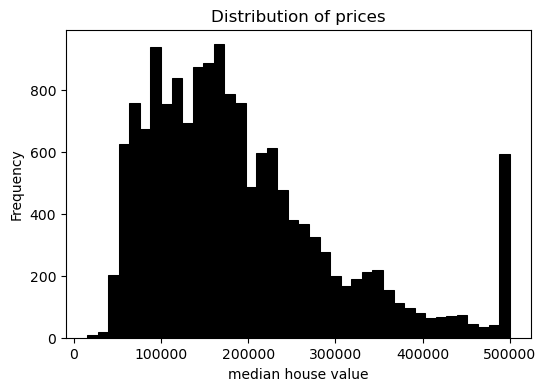

In [94]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('median house value')
plt.title('Distribution of prices')

plt.show()

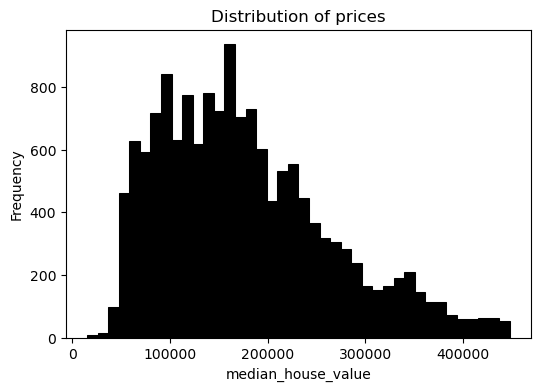

In [95]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value[df.median_house_value < 450000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('median_house_value')
plt.title('Distribution of prices')

plt.show()

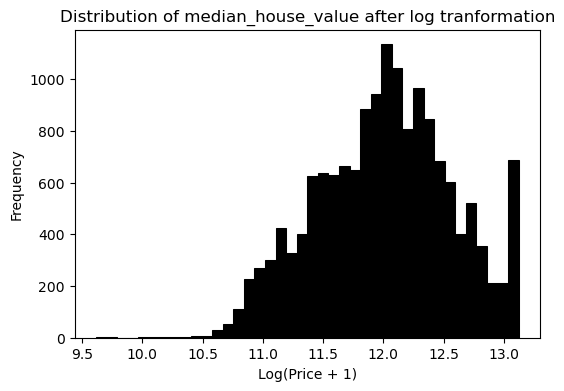

In [96]:
log_price = np.log1p(df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of median_house_value after log tranformation')

plt.show()

In [97]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [98]:
df.mean()

latitude                  35.467307
longitude               -119.217442
housing_median_age        27.188118
total_rooms             2665.677312
total_bedrooms           541.244688
population              1466.317205
households               500.916491
median_income              3.804019
median_house_value    191943.020017
dtype: float64

In [185]:
df.median()

latitude                  34.1600
longitude               -118.3700
housing_median_age        27.0000
total_rooms             2118.0000
total_bedrooms           432.0000
population              1195.0000
households               406.0000
median_income              3.4688
median_house_value    166900.0000
dtype: float64

## Validation framework

In [100]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [101]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Linear Regression

In [102]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## Baseline solution

In [106]:
base = ['latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'    
       ]

In [180]:


def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X



In [112]:
df_train.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [133]:
X_train = prepare_X(df_train, 541) # 541 - mean
w_0, w = train_linear_regression(X_train, y_train)

In [134]:
X_train

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [135]:
y_pred = w_0 + X_train.dot(w)

In [136]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

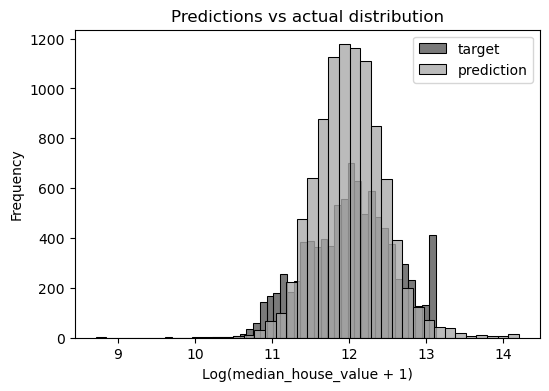

In [137]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(median_house_value + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [162]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [139]:
rmse(y_train, y_pred)

0.34141490530146723

In [88]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [89]:
rmse(y_val, y_pred)

nan

fillna: 0; rmse: 0.3402719715829534
fillna:541; rmse: 0.3400293019232464

## Regularization

In [141]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [142]:
X_train = prepare_X(df_train)

In [144]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[0], w[1]))

    0, -9.76, -0.27, -0.26
0.001, -9.74, -0.27, -0.26
 0.01, -9.56, -0.27, -0.25
  0.1, -8.06, -0.25, -0.24
    1, -3.13, -0.21, -0.18
   10, -0.44, -0.19, -0.15



### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [146]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.3408479034201643
 1e-06 0.340847906183037
0.0001 0.3408481800532384
 0.001 0.34085069219124486
  0.01 0.3408779300469964
   0.1 0.34128620419947425
     1 0.34489583276302355
     5 0.3477398070480636
    10 0.3483149833520889



### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

In [167]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmses = []
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

for seed in seeds:
    np.random.seed(seed)

    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)

    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    xx =  rmse(y_val, y_pred)
    print('%6s' %r, xx)
    rmses.append(xx)
    
    
np.array(rmses).std()
    
    




    10 0.34532166935550285
    10 0.3457306801239497
    10 0.3466523969253678
    10 0.3386232228605733
    10 0.348128749638435
    10 0.34821106941838936
    10 0.3446185557991267
    10 0.352162972466302
    10 0.3590292364669678
    10 0.3398799998550025


0.005521911019575936

Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:

    0.13
    0.23
    0.33
    0.43


In [184]:

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
seed = 9
np.random.seed(seed)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values



y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)



df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index (drop = True)

X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score








0.3349899336608947